<a href="https://colab.research.google.com/github/reshma-susarapu/GenAI/blob/main/Cluster_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values in each column:
Age                  0
Annual_Income        0
Spending_Score       0
Monthly_Visits       0
Gender               0
Preferred_Product    0
dtype: int64

Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                350 non-null    int64 
 1   Annual_Income      350 non-null    int64 
 2   Spending_Score     350 non-null    int64 
 3   Monthly_Visits     350 non-null    int64 
 4   Gender             350 non-null    object
 5   Preferred_Product  350 non-null    object
dtypes: int64(4), object(2)
memory usage: 16.5+ KB
None
     Age  Annual_Income  Spending_Score  Monthly_Visits  Gender  \
0     56          26102              85               6  Female   
1     46          70336              75              18    Male   
2     32         105314              36              

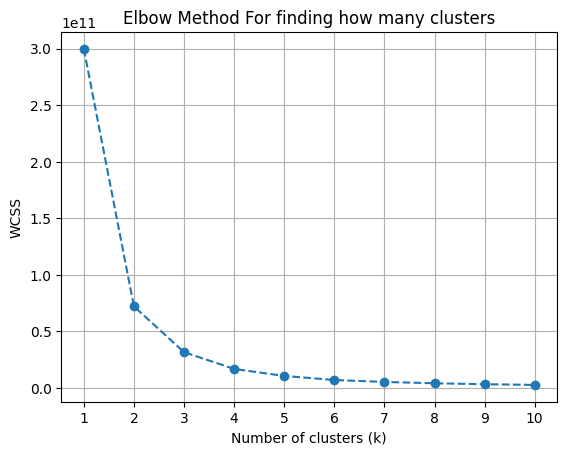

In [38]:
import pandas as pd
data=pd.read_csv('customer_segment.csv')
print('Missing values in each column:')
print(data.isnull().sum())
print('\nData types of each column:')
print(data.info())
print(data)
data1 = pd.get_dummies(data, columns=['Gender', 'Preferred_Product'], drop_first=True)
print(data1.head())
print(data1.info())
x = data1.copy()
print(x.head())
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
print('Features after scaling...')
print(x_scaled.head())
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11): # Test k from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

print("WCSS values calculated for k from 1 to 10:")
print(wcss)
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For finding how many clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
df = pd.read_csv("customer_segment.csv")
df_encoded = pd.get_dummies(df, columns=['Preferred_Product'], drop_first=True)
features = ['Annual_Income', 'Spending_Score', 'Monthly_Visits']
features += [col for col in df_encoded.columns if col.startswith("Preferred_Product_")]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(df_encoded[features])
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(x_scaled)
profile = df.groupby('Cluster').agg({
    'Annual_Income': 'mean',
    'Spending_Score': 'mean',
    'Monthly_Visits': 'mean',
    'Preferred_Product': lambda x: x.value_counts().index[0]
})
print("\nCLUSTER PROFILES:\n")
print(profile)
def assign_segment(row):
    income = row['Annual_Income']
    spending_score = row['Spending_Score']
    visitpermonth = row['Monthly_Visits']
    prefered = row['Preferred_Product']
    if income > df['Annual_Income'].median() and spending_score > df['Spending_Score'].median() and visitpermonth < df['Monthly_Visits'].median():
        return "Occasional Luxury Buyers"
    if income > df['Annual_Income'].median() and spending_score > df['Spending_Score'].median() and visitpermonth >= df['Monthly_Visits'].median():
        return "High-Value Premium Shoppers"
    return "Budget Conscious Regulars"
df['Segment'] = df.apply(assign_segment, axis=1)
print("\nFINAL 3 SEGMENTS:\n")
print(df[['Annual_Income','Spending_Score','Monthly_Visits','Preferred_Product','Cluster','Segment']].head(20))
df.to_csv("final_segments.csv", index=False)
print("\nSaved → final_segments.csv")


CLUSTER PROFILES:

         Annual_Income  Spending_Score  Monthly_Visits Preferred_Product
Cluster                                                                 
0         68182.626866       53.701493        8.925373       Electronics
1         74552.268657       51.119403        9.268657              Home
2         71100.903226       48.019355        9.767742            Sports
3         71160.131148       47.278689        9.836066         Groceries

FINAL 3 SEGMENTS:

    Annual_Income  Spending_Score  Monthly_Visits Preferred_Product  Cluster  \
0           26102              85               6          Clothing        2   
1           70336              75              18              Home        1   
2          105314              36              10         Groceries        3   
3           46641              99               5       Electronics        0   
4           54584              19              10       Electronics        0   
5           52745              20         

In [43]:
d=pd.read_csv('final_segments.csv')
print(d)

     Age  Annual_Income  Spending_Score  Monthly_Visits  Gender  \
0     56          26102              85               6  Female   
1     46          70336              75              18    Male   
2     32         105314              36              10    Male   
3     60          46641              99               5  Female   
4     25          54584              19              10    Male   
..   ...            ...             ...             ...     ...   
345   48          87641              37              12  Female   
346   52          56395              11              12    Male   
347   50          42700              77              19    Male   
348   38          54620               3               6  Female   
349   49          40559              33               2    Male   

    Preferred_Product  Cluster                    Segment  
0            Clothing        2  Budget Conscious Regulars  
1                Home        1  Budget Conscious Regulars  
2           Gro

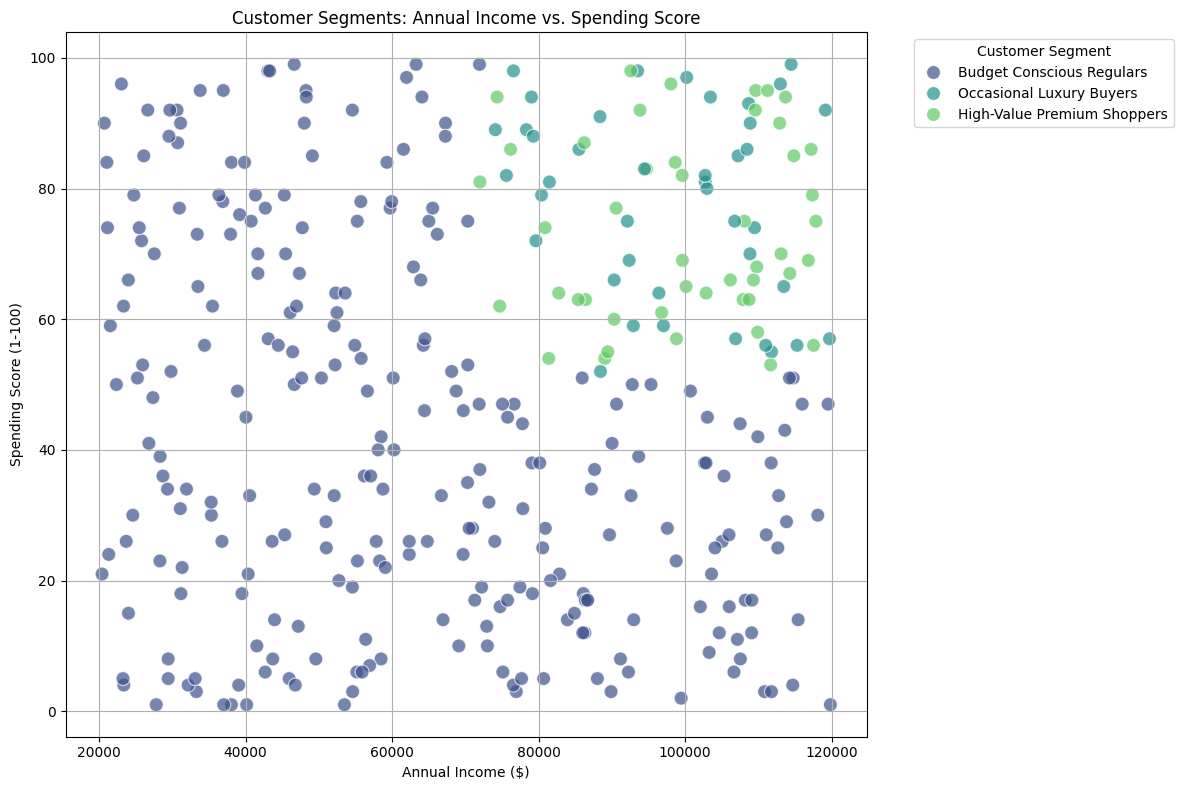

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
d = pd.read_csv('final_segments.csv')
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='Segment', data=d, palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segments: Annual Income vs. Spending Score')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()